## Unsupervised_Learning Project

### Part 1 - To segment cars into various categories by fuel consumption and other attributes 
### Part 2 - To classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

### 1. Data Understanding and Exploration

In [1]:
# we import useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score
from sklearn.decomposition import PCA
from scipy.stats import zscore

#### 1.A

In [2]:
# reading csv files and assigning it to a variable
df1= pd.read_csv("Carname.csv")

In [3]:
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [4]:
df1.shape

(398, 1)

#### 1.B

In [5]:
df2= pd.read_json("Car-Attributes.json")

In [6]:
df2.shape

(398, 8)

In [7]:
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


#### 1.C

In [8]:
# merging both the dataframes

df= pd.concat([df1,df2], axis=1)

In [9]:
df.shape

(398, 9)

In [10]:
df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [11]:
df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [12]:
# hp is object but it should be float
# we change category of hp attribute

df['hp']=pd.to_numeric(df['hp'], errors='coerce')

# changing dtype of multi discrete variables to object 

df['cyl']=df['cyl'].astype('object')

df['yr']=df['yr'].astype('object')

df['origin']=df['origin'].astype('object')

In [13]:
df.dtypes

car_name     object
mpg         float64
cyl          object
disp        float64
hp          float64
wt            int64
acc         float64
yr           object
origin       object
dtype: object

#### 1.D

In [98]:
# 5 point summary of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8


#### Ensights:

### 2. Data Preparation & Analysis

#### 2.A:

In [17]:
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [18]:
# Imputing missing values with median of the respective column

median = df['hp'].median()
df['hp'].fillna(median, inplace=True)

In [19]:
df['hp'].unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

In [20]:
# checking value counts for object attributes

obj=['cyl', 'yr', 'origin']
for cols in obj:
    print("\nUnique values in ", cols, 'attribute are:\n')
    print(df[cols].value_counts())
    


Unique values in  cyl attribute are:

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

Unique values in  yr attribute are:

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: yr, dtype: int64

Unique values in  origin attribute are:

1    249
3     79
2     70
Name: origin, dtype: int64


In [21]:
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

#### 2.B:

In [22]:
# checking for duplicates

In [23]:
df.duplicated().sum()

0

#### 2.C:

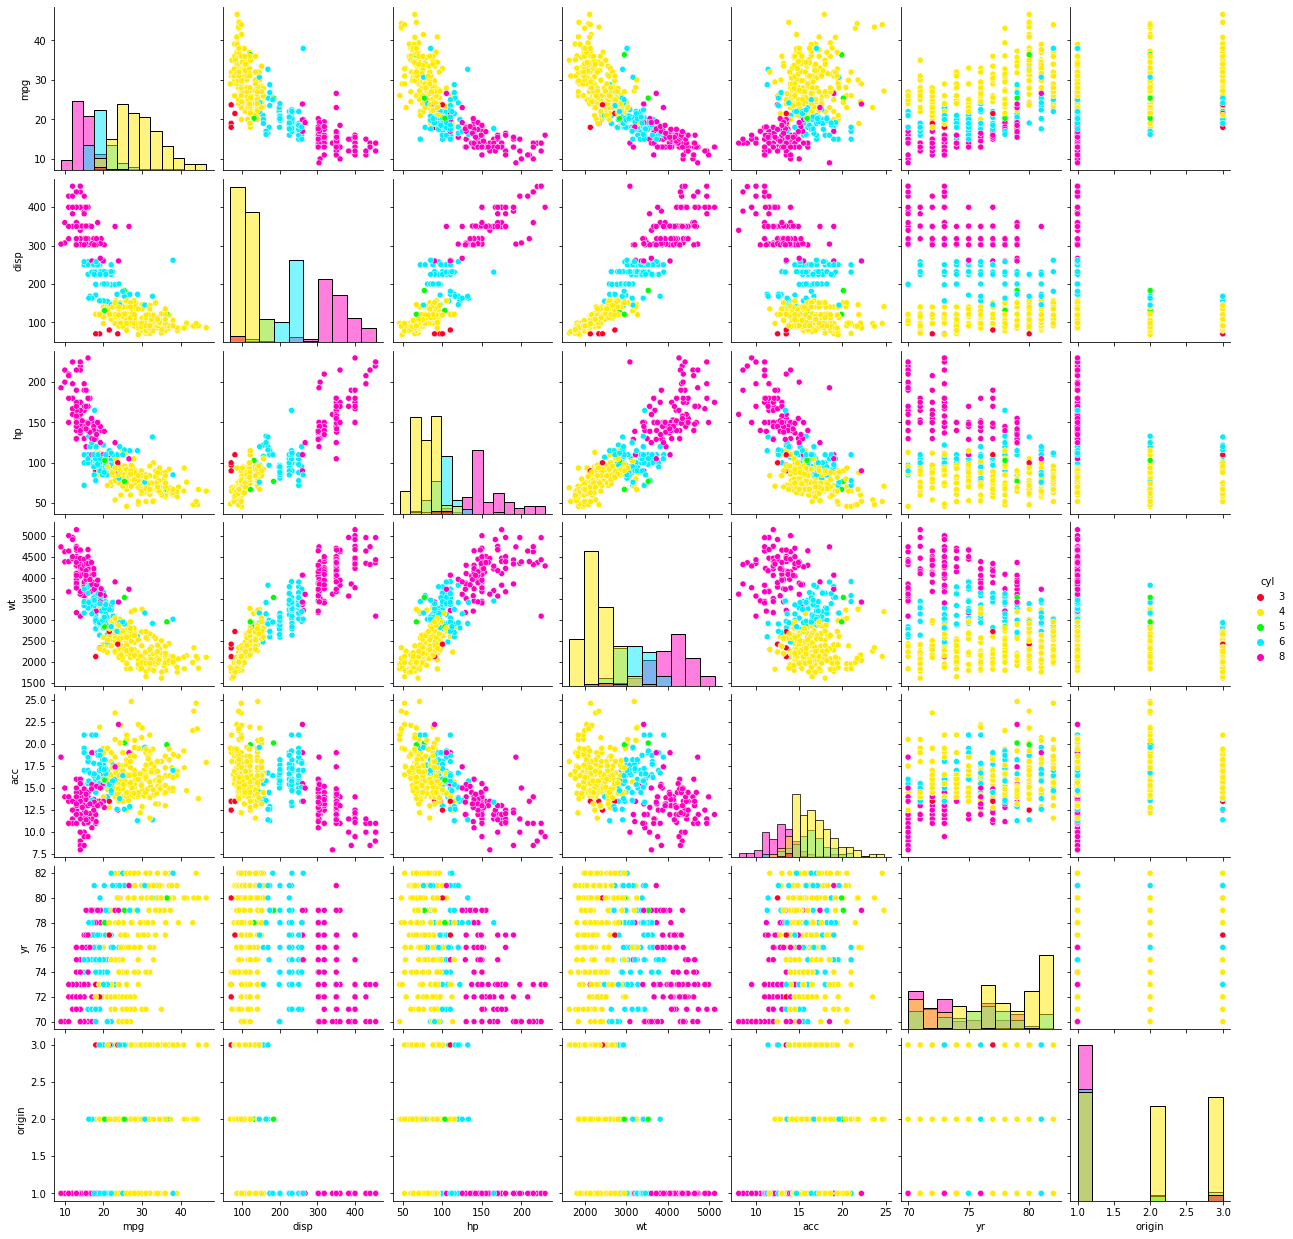

In [24]:
# plotting pairplot between numerical columns
sns.pairplot(df, diag_kind='hist', hue='cyl', palette='gist_rainbow')

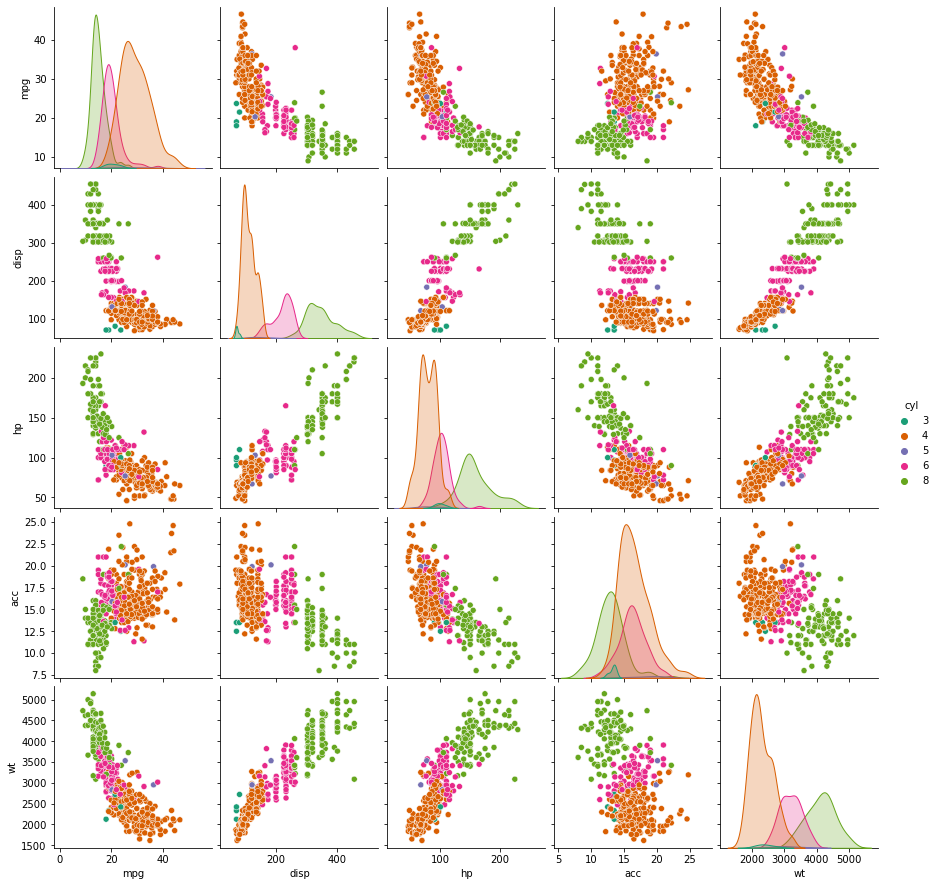

In [25]:
# for better understanding we plot pairplot between numerical columns

cols_plot=['mpg','disp','hp','acc','wt', 'cyl']

sns.pairplot(df[cols_plot], diag_kind='kde', hue='cyl', palette='Dark2' )

<AxesSubplot:>

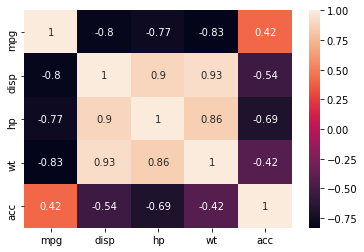

In [26]:
sns.heatmap(df.corr(), annot=True)

#### 2.D:

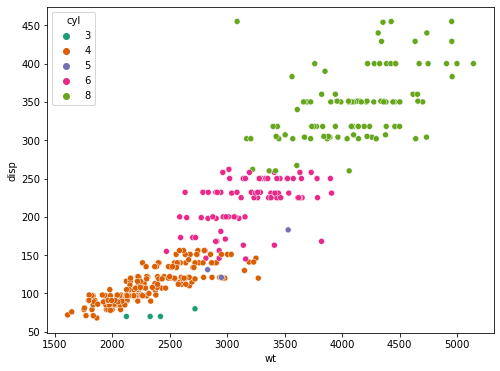

In [27]:
# scatter plot between wt and disp

plt.figure(figsize=[8,6])
sns.scatterplot(x='wt', y='disp', hue='cyl', data=df, palette='Dark2' )
plt.show()

#### 2.E: Insights:

    1. 'wt' and 'disp' are highly correlated. As weight increases so does disp . 
    2. there is linear relationship between the two.
    3. most of the datapoints are of cars having 4,6,8 cylinders engine.
    4. Very few datapoints are present of 3 and 5 cylinders engine cars.


#### 2.F:

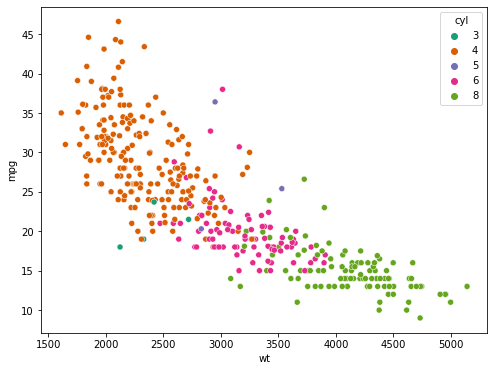

In [28]:
# scatter plot between wt and mpg

plt.figure(figsize=[8,6])
sns.scatterplot(x='wt', y='mpg', hue='cyl', data=df, palette='Dark2' )
plt.show()

#### 2.G: Insights:

    1. 'mpg' and 'wt' are negatively correlated. As wt increases mpg decreases. 
    2. They follow negative linear relationship.
    3. Most of the outliers are present in 4 cylinder engines.
    4. A few datapoints are present of 3 and 5 cylinder engines.


#### 2.H:

In [29]:
# These unexpecte values are already dealt with in Cell 12 while converting into numeric dtype
# '?' are converted to nan values. 
# those nan values were filled by median values.

#unexpected values 
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

### 3.Clustering

#### 3.A:

In [30]:
# Importing K-means
from sklearn.cluster import KMeans
from sklearn import metrics

In [31]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=df.drop(['car_name'], axis=1)

df_scaled=sc.fit_transform(x)

# statistics of scaled data
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,2.761610e-16,-5.171742e-16,-8.312725e-17,1.458911e-16,-9.902743e-17,8.982206e-17,-8.837152e-16,-4.781212e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.859374e+00,-1.444949e+00,-1.204411e+00,-1.527300e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00,-7.151448e-01
25%,-7.704907e-01,-8.563206e-01,-8.563178e-01,-7.414364e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01,-7.151448e-01
50%,-6.591883e-02,-8.563206e-01,-4.314040e-01,-2.830161e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03,-7.151448e-01
75%,7.027050e-01,1.498191e+00,6.584879e-01,5.421404e-01,7.538337e-01,5.834349e-01,8.096310e-01,5.332220e-01
max,2.957335e+00,1.498191e+00,2.511784e+00,3.292662e+00,2.565185e+00,3.351912e+00,1.621983e+00,1.781589e+00


In [32]:
# KMeans Clustering Algorithm

cluster_range = range( 2, 11)   
cluster_error = []

for num in cluster_range:
  clusters = KMeans(num, init='k-means++')
  clusters.fit(df_scaled)
 # capture the cluster lables
  labels = clusters.labels_  
 # capture the centroids
  centroids = clusters.cluster_centers_   
  # capture the intertia   
  cluster_error.append( clusters.inertia_ )   
  
 # combine the cluster_range and cluster_errors into a dataframe
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_error } )
clusters_df

,num_clusters,cluster_errors
0,2,1588.592457
1,3,1190.043653
2,4,987.943167
3,5,829.715787
4,6,750.799202
5,7,680.809765
6,8,636.055198
7,9,593.640598
8,10,562.107465


#### 3.B:

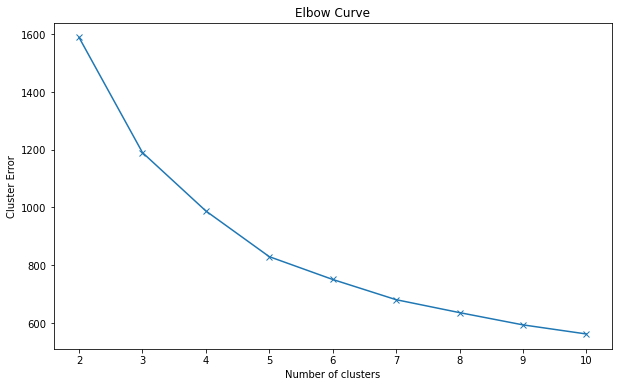

In [33]:
# plotting elbow point and curve

plt.figure(figsize=(10,6))
plt.ylabel("Cluster Error")
plt.xlabel("Number of clusters")
plt.title("Elbow Curve")
plt.plot( clusters_df['num_clusters'], clusters_df['cluster_errors'], marker = "x" )
plt.show()

#### 3.C:

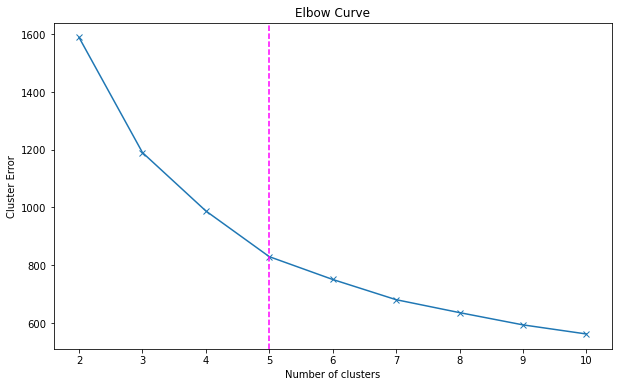

In [34]:

# finding elbow point

plt.figure(figsize=(10,6))
plt.ylabel("Cluster Error")
plt.xlabel("Number of clusters")
plt.title("Elbow Curve")
plt.plot( clusters_df['num_clusters'], clusters_df['cluster_errors'], marker = "x", )

plt.axvline(5, 0, 1, label='Elbow point ', color='magenta',ls='--' )
plt.show()

#### 3.D:

In [35]:
# Now we model for K= 5
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans = kmeans.fit(df_scaled)
labels = kmeans.predict(df_scaled)

# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids

print("Centroid values")
print(centroids) 

Centroid values
[[-1.16379715  1.49819126  1.50392292  1.52168282  1.40409797 -1.0861486
  -0.68832385 -0.71514478]
 [ 0.67593702 -0.74210918 -0.58440021 -0.56158707 -0.4807633   0.35623968
   0.99150092 -0.62198308]
 [ 0.14148761 -0.82829067 -0.8145352  -0.48805783 -0.7363707   0.19571855
  -0.73125973  0.66697557]
 [-0.56489172  0.45174156  0.38428116 -0.06342714  0.38799297  0.38631896
  -0.08295379 -0.66890897]
 [ 1.36083919 -0.80726824 -0.9016633  -0.82329716 -0.96314389  0.42357938
   0.9224577   1.48683549]]


#### 3.E:

In [37]:
# Adding cluster labels column as group to dataframe

df_scaled = pd.DataFrame(data=df_scaled, )
df_scaled["group"] = labels

df_scaled.columns=[ 'mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'group']

df_scaled.head(10)


,mpg,cyl,disp,hp,wt,acc,yr,origin,group
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,0
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,0
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,0
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,0
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,0
5,-1.090751,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.627426,-0.715145,0
6,-1.218855,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.627426,-0.715145,0
7,-1.218855,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.627426,-0.715145,0
8,-1.218855,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.627426,-0.715145,0
9,-1.090751,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.627426,-0.715145,0


In [102]:
# checking cluster labels in group column

df_scaled['group'].value_counts()

0    94
2    84
3    81
4    72
1    67
Name: group, dtype: int64

In [101]:
# Now we change cyl column back to numerical unscaled one as it is categorical in nature.
df_scaled['cyl']= df['cyl']

In [103]:
df_scaled['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'yr'}, xlabel='[group]'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

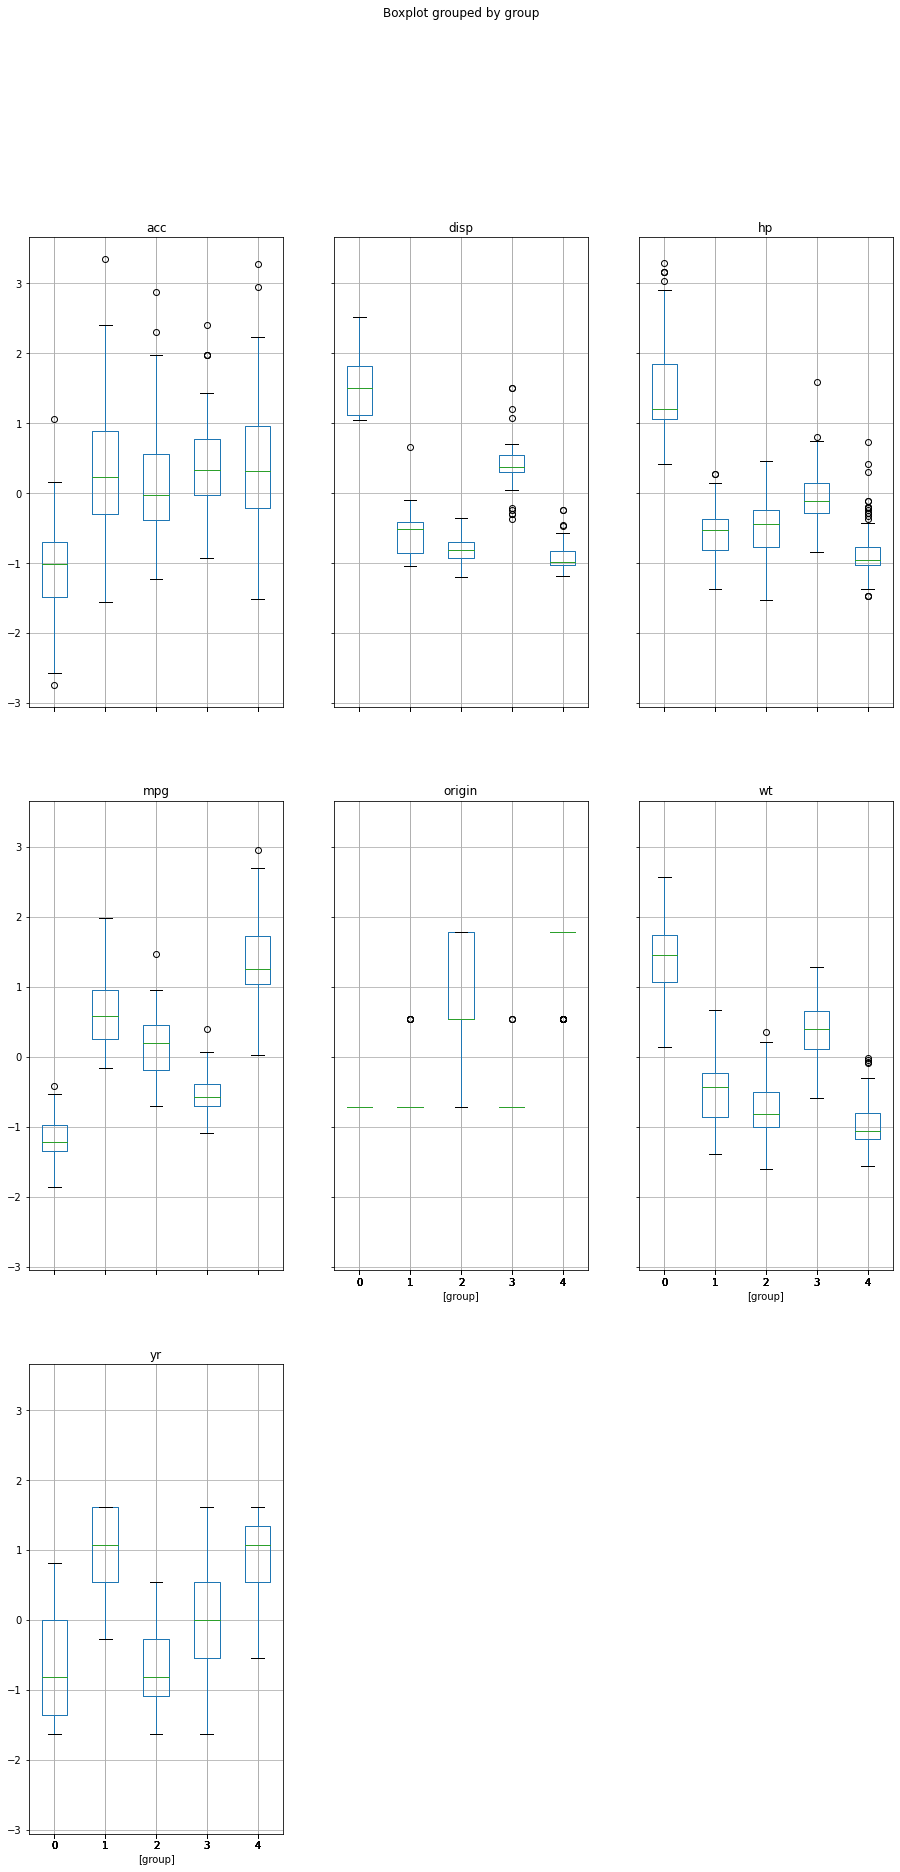

In [106]:

df_scaled.boxplot(by = 'group',  layout=(4,3), figsize=(15, 40))


In [40]:
# plotting datapoints for various attributes and clustering them 

<AxesSubplot:xlabel='group', ylabel='mpg'>

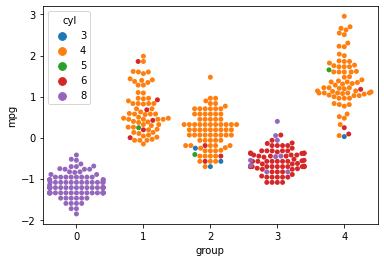

In [113]:
sns.swarmplot(y=df_scaled['mpg'], x=df_scaled['group'], hue=df_scaled['cyl'], data=df_scaled)

<AxesSubplot:xlabel='group', ylabel='disp'>

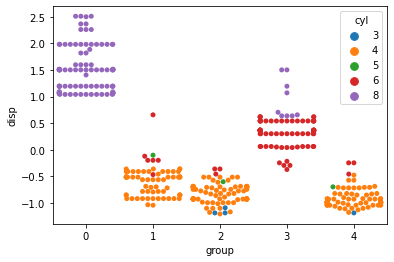

In [112]:
sns.swarmplot(y=df_scaled['disp'], x=df_scaled['group'], hue=df_scaled['cyl'], data=df_scaled)

<AxesSubplot:xlabel='group', ylabel='hp'>

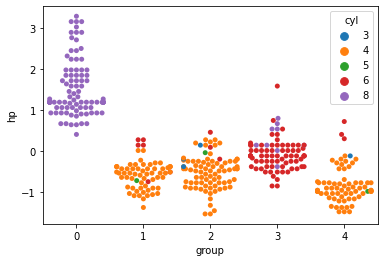

In [114]:
sns.swarmplot(y=df_scaled['hp'], x=df_scaled['group'], hue=df_scaled['cyl'], data=df_scaled)

<AxesSubplot:xlabel='group', ylabel='acc'>

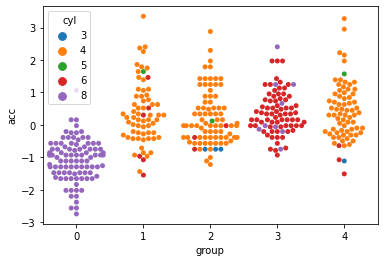

In [116]:
sns.swarmplot(y=df_scaled['acc'], x=df_scaled['group'], hue=df_scaled['cyl'], data=df_scaled)

<AxesSubplot:xlabel='group', ylabel='wt'>

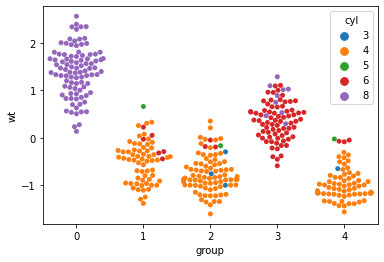

In [117]:
sns.swarmplot(y=df_scaled['wt'], x=df_scaled['group'], hue=df_scaled['cyl'], data=df_scaled)

In [147]:
# if we give the input to the model 
ip=[[2,2,2,2,2,2,1,1]]

# entering the input to the model

k = (kmeans.predict(ip))
print("value of k :", k[0])

if k[0]==0:
     print(" Cluster 1 categry")
elif k[0]==1:
     print("Cluster 2 categry")
elif k[0]==2:
     print("Cluster 3 category")
elif k[0]==3:
     print("Cluster 4 categry")
else:
     print("Cluster 5 categry")
    
# it will give the group value 

value of k : 3
Cluster 4 categry


## Part- B

### 1. Data Undersatnding & Cleaning

In [48]:
vehl= pd.read_csv("vehicle.csv")


In [49]:
vehl.shape

(846, 19)

In [50]:
vehl.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [51]:
vehl.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [52]:
# finding missing values and imputing them 

vehl.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [53]:
cols=list(vehl.columns)
cols.remove('class')

In [54]:
#cols=vehl.columns
for column in cols:
    medin = vehl[column].median()
    vehl[column].fillna(medin, inplace=True)


In [55]:
vehl['circularity'].unique()

array([48., 41., 50., 44., 43., 34., 36., 46., 42., 49., 55., 54., 56.,
       47., 37., 39., 53., 45., 38., 35., 40., 59., 52., 51., 58., 57.,
       33.])

In [56]:
vehl.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [57]:
vehl['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

([<matplotlib.patches.Wedge at 0x207c48b7400>,
 [Text(-0.02450677950444812, 1.0997269741887394, 'van'),
  Text(-0.7225894398582384, -0.82937597108028, 'car'),
  Text(0.8130715899221039, -0.7408877038131637, 'bus')],
 [Text(-0.01336733427515352, 0.5998510768302214, '50.709%'),
  Text(-0.39413969446813, -0.4523868933165163, '25.768%'),
  Text(0.4434935945029657, -0.4041205657162711, '23.522%')])

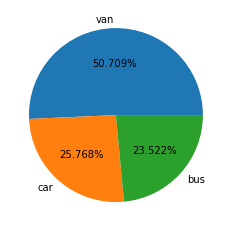

In [58]:
# Visualising a piechart and printing %ge :

plt.pie(vehl['class'].value_counts(), labels= vehl['class'].unique(), autopct='%.3f%%'  )

In [59]:
# checking for duplicate values
vehl.duplicated().sum()

0

**Inference:**   No duplicates found 

### 2.Data Preparation:

In [60]:
# Spliting data 

from sklearn.model_selection import train_test_split
X= vehl.drop(['class'], axis=1)
y= vehl['class']

In [61]:
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [62]:
from scipy.stats import zscore

In [63]:
# Standardising data

X_scaled= X.apply(zscore)
X_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


### 3. Model Building

In [64]:
# SVM model 

#### 3.A:

In [65]:
from sklearn import svm

# splitting data into train and test sets

xsvm_train, xsvm_test, ysvm_train, ysvm_test = train_test_split(X_scaled, y, test_size=0.25,random_state=1)
clf = svm.SVC() 

#Fitting the model 

clf.fit(xsvm_train , ysvm_train)
ysvm_pred = clf.predict(xsvm_train)

#### 3.B:

In [66]:
print(classification_report(ysvm_train , ysvm_pred))

              precision    recall  f1-score   support

         bus       0.99      0.98      0.98       166
         car       0.98      0.98      0.98       322
         van       0.95      0.95      0.95       146

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [67]:
print("Precision score for training data: \n")
print(precision_score(ysvm_train,ysvm_pred,average='weighted'))
print(" ")
print("Recall score for training data: \n")
print(recall_score(ysvm_train,ysvm_pred,average='weighted'))
print(" ")
print("f1 score for training data : \n")
print(f1_score(ysvm_train,ysvm_pred,average='weighted'))

Precision score for training data: 

0.9733208195217371
 
Recall score for training data: 

0.973186119873817
 
f1 score for training data : 

0.9732247204158776


#### 3.C:  PCA model 

In [68]:
X_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


In [69]:
# CoVariance matrix

covMatrix = np.cov(X_scaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [70]:
pca = PCA(n_components=10)
pca.fit(X_scaled)

PCA(n_components=10)

In [71]:
print("Eigen values are: \n")
print(pca.explained_variance_)

Eigen values are: 

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


In [72]:
print("Eigen Vectors are: \n")
print(pca.components_)

Eigen Vectors are: 

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-0

In [73]:
print("Explained variance ratio: \n")
print(pca.explained_variance_ratio_)

Explained variance ratio: 

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


#### 3.D:

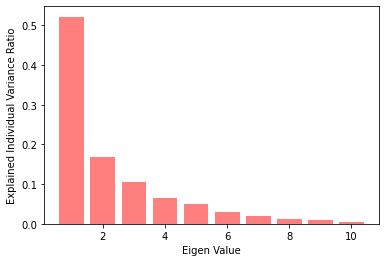

In [74]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center', color='red')
plt.ylabel('Explained Individual Variance Ratio')
plt.xlabel('Eigen Value')
plt.show()

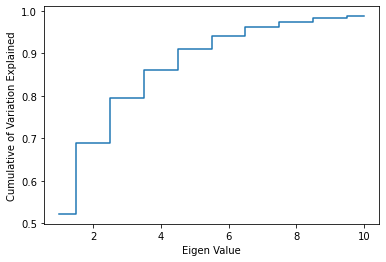

In [75]:
# Cumulative variance explained with Eigen values

plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumulative of Variation Explained')
plt.xlabel('Eigen Value')
plt.show()  

#### 3.E:

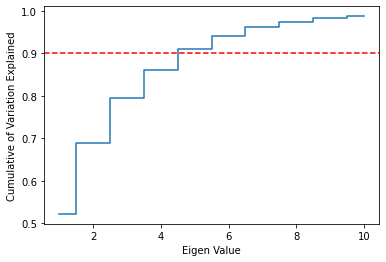

In [76]:
# Horizontal line representing 90% threshold

plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumulative of Variation Explained')
plt.xlabel('Eigen Value')
plt.axhline(0.90, 0, 10, color='red',ls='--' )
plt.show()

#### 3.F:

In [77]:
# Selecting 90% or above explained variance variables
# We can see by above plot with 6 variables more than 90% variance can be explained easily
# we apply PCA on 6 variables

# Initialising model 

pca6= PCA(n_components=6)

# fitting the model

pca6.fit(X_scaled)

# printing Eigen values 
print("*****************************************************************\n")
print("Eigen Values are: \n")
print(pca6.explained_variance_ratio_,'\n')

# printing Eigen vectors
print("*****************************************************************\n")
print("Eigen Vectors are :\n")
print(pca6.components_,'\n')

# Explianed variance ratio 
print("*****************************************************************\n")
print("Explained Varaince Ratio: \n")
print(pca6.explained_variance_ratio_,'\n')

# fitting model data into an array

print("*****************************************************************\n")
pca_new = pca6.transform(X_scaled)

*****************************************************************

Eigen Values are: 

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413] 

*****************************************************************

Eigen Vectors are :

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.7064

In [78]:
# Finding Cumulative variance ratio 
print("Cumulative Variance ratio sum of 6 variables are:\n")
print(sum(pca6.explained_variance_ratio_))

Cumulative Variance ratio sum of 6 variables are:

0.9411218252249516


In [79]:
pca_new

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00,
         1.76612370e-01,  7.93007081e-02, -7.57446694e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01,
         2.33234117e-01,  6.93948582e-01, -5.17161832e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02,
         1.20221219e+00,  7.31732266e-01,  7.05041036e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01,
         2.95652324e-01, -1.34423635e+00, -2.17069763e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01,
        -1.93367514e+00,  4.27680050e-02, -4.02491278e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01,
        -1.22480708e+00, -5.40510367e-02, -3.35637136e-01]])

In [80]:
# Converting this data into a dataframe 
pca_new=pd.DataFrame(pca_new)

In [81]:
pca_new.head()

,0,1,2,3,4,5
0,0.334162,-0.219026,1.001584,0.176612,0.079301,-0.757447
1,-1.591711,-0.420603,-0.369034,0.233234,0.693949,-0.517162
2,3.769324,0.195283,0.087859,1.202212,0.731732,0.705041
3,-1.738598,-2.829692,0.109456,0.376685,-0.362897,-0.484431
4,0.558103,4.758422,11.703647,0.147464,3.256953,-0.203446


In [82]:
pca_new.shape

(846, 6)

In [83]:
y.shape

(846,)

### So we can see dimensions are reduced from 18 attributes to only 6

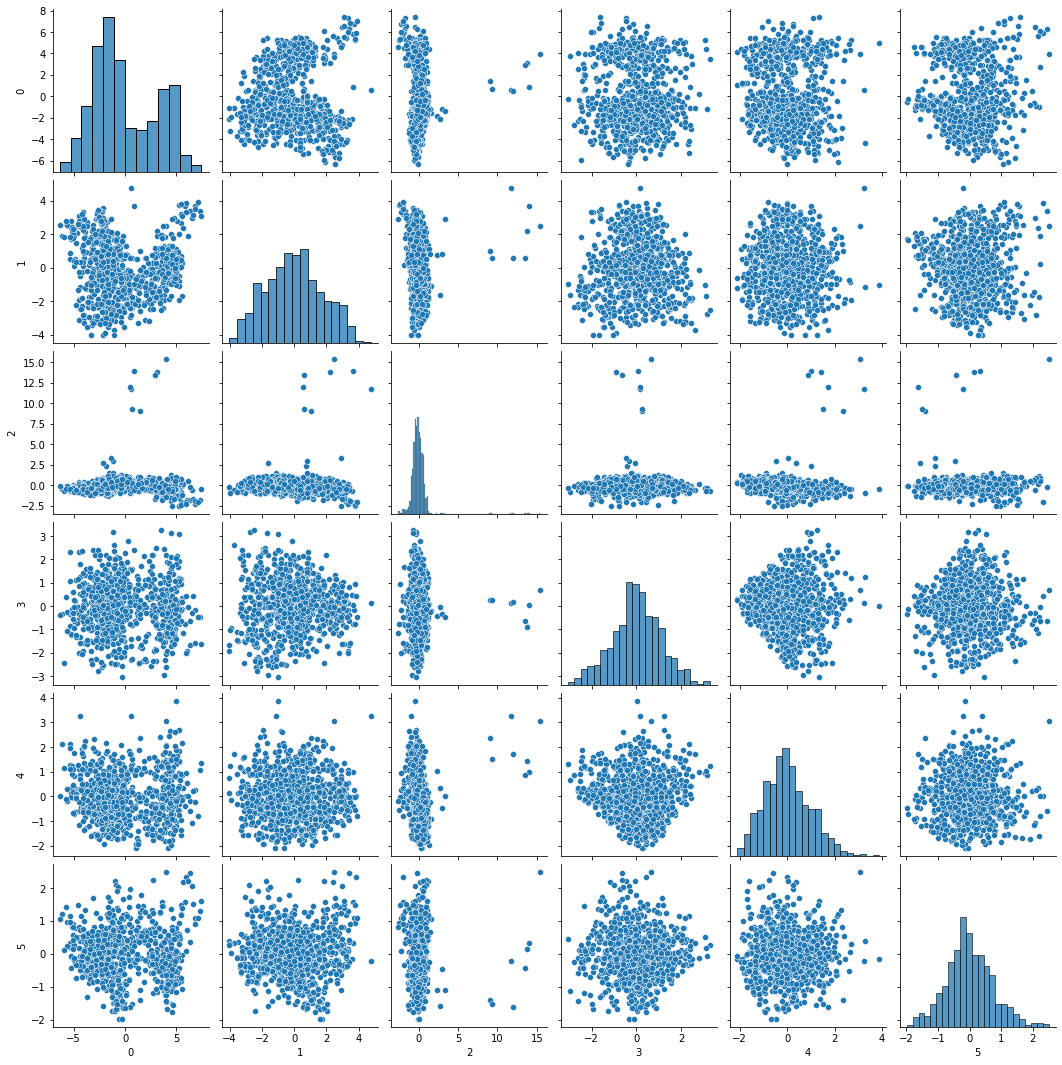

In [84]:
sns.pairplot(pca_new, )

### Conclusion: 
                1. Variables are independent from each other .
                2. No correlation between data points can be observed.

#### 3.G:

In [85]:
# Training SVM model on above pca_new data

clf1 = svm.SVC() 

#Fitting the model 

clf1.fit(pca_new , y)
y_pred = clf1.predict(pca_new)

print("\nAccuracy score for SVM pca data is:\n")
clf1.score(pca_new,y)


Accuracy score for SVM pca data is:



0.9066193853427896

#### 3.H:

In [86]:
print(classification_report(y , y_pred))

              precision    recall  f1-score   support

         bus       0.93      0.87      0.90       218
         car       0.92      0.92      0.92       429
         van       0.87      0.91      0.89       199

    accuracy                           0.91       846
   macro avg       0.90      0.90      0.90       846
weighted avg       0.91      0.91      0.91       846



In [87]:
print("Precision score for SVM training data: \n")
print(precision_score(y,y_pred,average='weighted'))
print(" ")
print("Recall score for SVM training data: \n")
print(recall_score(y,y_pred,average='weighted'))
print(" ")
print("f1 score for SVM training data : \n")
print(f1_score(y,y_pred,average='weighted'))

Precision score for SVM training data: 

0.9073741056814009
 
Recall score for SVM training data: 

0.9066193853427896
 
f1 score for SVM training data : 

0.9066467825629403


### Conclusion:

 For SVM model, Accuracy score has reduced from 97%(with 18 attributes) to 90.6% (PCA 6 attributes)

### 4.Performance Improvement:

#### 4.A:

In [88]:
# Training another SVM model for hypertuning parameters

# splitting data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(pca_new, y, test_size=0.25,random_state=1)
clf2 = svm.SVC() 

#Fitting the model 

clf2.fit(x_train , y_train)
y_pred = clf2.predict(x_train)

# printing accuracy score

print("\nAccuracy score for third SVM model is:", clf2.score(x_train, y_train))


Accuracy score for third SVM model is: 0.8990536277602523


#### 4.B:

In [89]:
# Now we do hypertuning for best parameters for SVM model

# we make a dictionary of all the parameters

param_grid = {'C': [0.1,1,10,50,100], 'gamma': [1,0.25,0.1, 0.01], }


In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.25; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.25; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.25; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.25; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.25; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50, 100],
                         'gamma': [1, 0.25, 0.1, 0.01]},
             verbose=2)

In [92]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


#### Conclusion After Hypertuning:
   Best parameters are C=10 & gamma= 0.1 

#### 4.C:

In [93]:
# Training SVM model for hyperparameters 

clf_new = svm.SVC(gamma=0.1, C=10) 
clf_new.fit(x_train , y_train)
y_prednew = clf_new.predict(x_train)

In [94]:
print("\nSVM accuracy after hypertuning for training data = ",clf_new.score(x_train, y_train))


SVM accuracy after hypertuning for training data =  0.9589905362776026


In [95]:
print(classification_report(y_train , y_prednew))

              precision    recall  f1-score   support

         bus       0.96      0.96      0.96       166
         car       0.97      0.96      0.97       322
         van       0.93      0.96      0.94       146

    accuracy                           0.96       634
   macro avg       0.95      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [96]:
print("Precision score for SVM training data: \n")
print(precision_score(y_train,y_prednew,average='weighted'))
print(" ")
print("Recall score for SVM training data: \n")
print(recall_score(y_train,y_prednew,average='weighted'))
print(" ")
print("f1 score for SVM training data : \n")
print(f1_score(y_train,y_prednew,average='weighted'))

Precision score for SVM training data: 

0.959366018052518
 
Recall score for SVM training data: 

0.9589905362776026
 
f1 score for SVM training data : 

0.9590866530263162


#### Conclusion:


### 5. Data Understanding & Cleaning

#### A. Assumptions of PCA

#### B. Advantages of PCA:

####  Limitations of PCA: